In [2]:
import os
import torch 
import copy

from pettingzoo.atari import combat_tank_v2
from pettingzoo.atari import space_war_v2
from pettingzoo.mpe import simple_v3
from itertools import count
from src.utils import (    
    save_episode_as_gif,
    
)
from src.agent import Agent, load

import numpy as np
from IPython.display import clear_output, display
from PIL import Image
from IPython.display import Image as IPImage
import io

import warnings
warnings.filterwarnings("ignore")
torch.set_default_dtype(torch.float32)
SEED = 42

In [3]:

# instantiate the environment

env = space_war_v2.env(render_mode="rgb_array")
# env = combat_tank_v2.env(render_mode="rgb_array", has_maze=False)
env.reset(seed=SEED)

# get the state and action dimensions
observation = env.last()[0]  # Get initial observation
H, W, C = observation.shape # (height, width, channels)
action_dim = env.action_space("first_0").n

# num_actions = environment.action_space.n
# state_dimension = environment.observation_space.shape[0]
print(f"Input channels: {C}\nAction space: {action_dim}")

Input channels: 3
Action space: 18


## Model Definition

In [4]:
player_one = load('checkpoints/first_0.pt')
player_two = load('checkpoints/second_0.pt')

agents_map = dict(zip(env.agents, [player_one, player_two]))

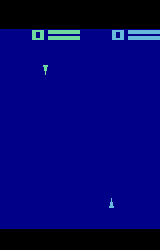

In [5]:
gif_path = save_episode_as_gif(env, agents_map, fps=60)
IPImage(open(gif_path,'rb').read())